# Analysis and Visualisation of Pollice Killing U.S. dataset

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [4]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

# 1.Number of people by gender

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

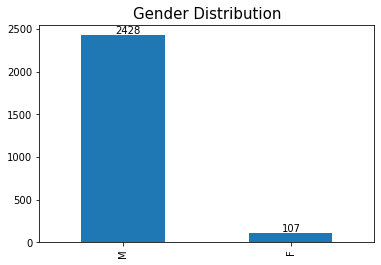

In [ ]:
#pandas

fig,ax = plt.subplots()
ax = kill.gender.value_counts().plot(kind="bar")
ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

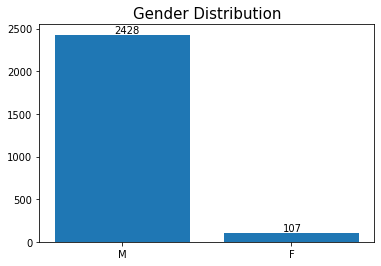

In [ ]:
#matplotlib

fig,ax = plt.subplots()
ax.bar(kill.gender.value_counts().index,kill.gender.value_counts().values)
ax.set_title("Gender Distribution",fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.35,p.get_height()+20));

In [ ]:
ax.patches

In [ ]:
ax.patches[1].get_x()

0.6

In [ ]:
ax.patches[1].get_height()

107

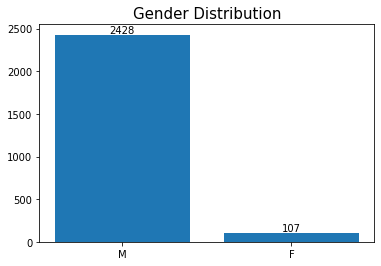

In [ ]:
## alternatif solution

x= kill.gender.value_counts().index
y= kill.gender.value_counts().values

plt.bar(x, y)
plt.title("Gender Distribution", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' ) 

# 2: 7 most common kill weapons

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
common_weapons = kill.armed.value_counts(dropna=False)[:7]
common_weapons

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [ ]:
common_weapons.isnull().any()

False

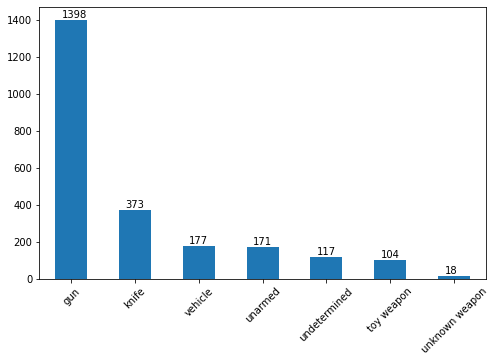

In [ ]:
#pandas
fig,ax = plt.subplots(figsize=(8,5))

ax = common_weapons.plot(kind="bar")
ax.set_xticklabels(common_weapons.index,rotation=45)

for p in ax.patches:
  ax.annotate((p.get_height()),(p.get_x()+0.1,p.get_height()+10))




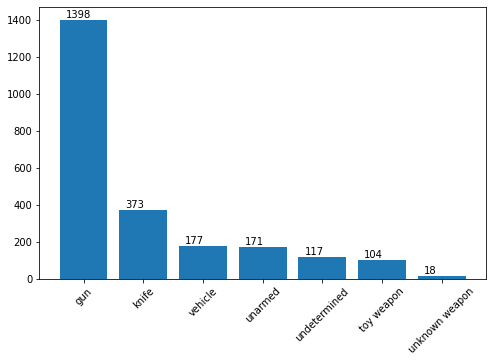

In [ ]:
# with matplotlib

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x = common_weapons.index, height=common_weapons.values)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

# 3: Number of age of killed people under two groups : Under 25 and Above 25

In [ ]:
kill["age_cat"] = kill.age.apply(lambda x : "above25" if x >=25 else ("below25" if x<25 else "others"))

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
age_class = kill.age_cat.value_counts()
age_class

above25    2008
below25     450
others       77
Name: age_cat, dtype: int64

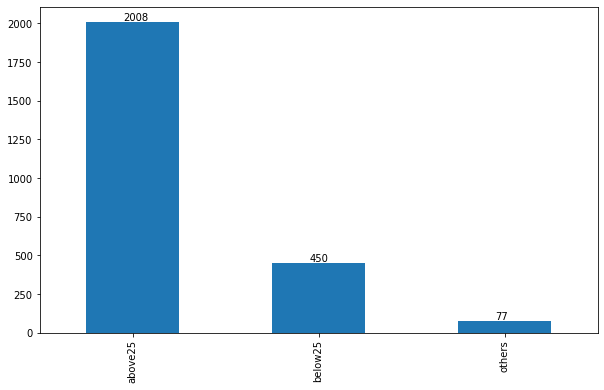

In [ ]:
# pandas
plt.figure(figsize=(10,6))
ax = age_class.plot.bar()

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.2, p.get_height()+10));

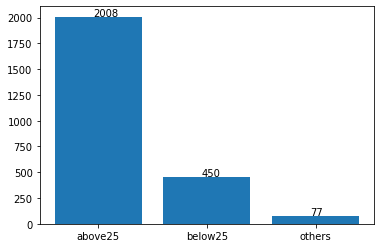

In [ ]:
# matplotlib
fig, ax = plt.subplots()
ax.bar(x = age_class.index, height=age_class.values)

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.35, p.get_height()+10));

# 4: Number of killed poeple by race

In [ ]:
race_kill= kill.race.value_counts()
race_kill

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

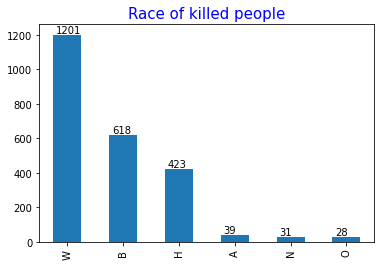

In [ ]:
#pandas
ax = race_kill.plot.bar()
ax.set_title("Race of killed people",color = "blue",fontsize=15);
 
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05,p.get_height()+10))



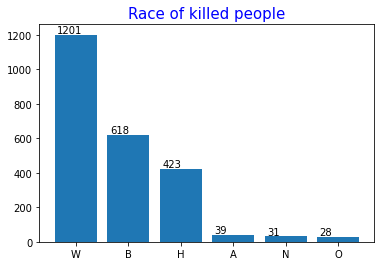

In [ ]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x=race_kill.index, height=race_kill.values)
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+10));

# 5: Killed People According to Races (Pie Chart)

In [ ]:
race_kill.isnull().any()

False

In [ ]:
labels = race_kill.index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [ ]:
sizes=race_kill.values
sizes

array([1201,  618,  423,   39,   31,   28])

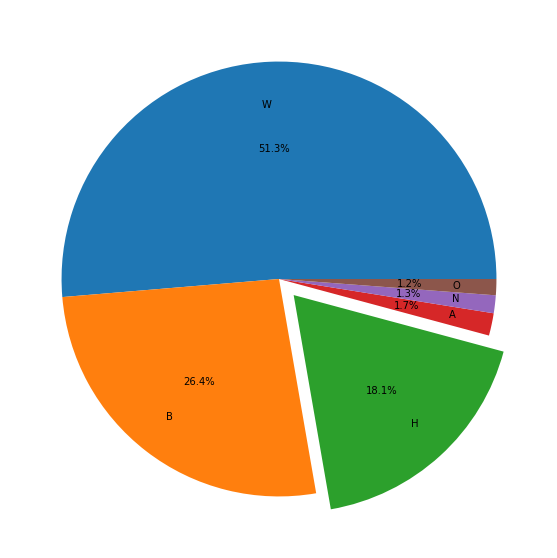

In [ ]:
explode = (0, 0, 0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(x = sizes, 
        explode=explode, 
        labels=labels, 
        labeldistance=0.8,
        autopct='%.1f%%',

#         shadow=True, 
        startangle=0,
#         radius=1.5,
       );

# 6: Most common 15 Name or Surname of killed people

# by name

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
kill.shape

(2535, 15)

In [ ]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [ ]:
kill[kill.name == "TK TK"]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
928,1074,TK TK,10/12/15,shot,gun,NaN,M,NaN,Hemet,CA,False,attack,Not fleeing,False,others
1397,1584,TK TK,01/06/16,shot,gun,NaN,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False,others
1419,1615,TK TK,09/06/16,shot,baton,NaN,M,NaN,Somerton,AZ,False,attack,Not fleeing,False,others
1500,1685,TK TK,04/07/16,shot,knife,NaN,M,NaN,Rosser,TX,False,other,Not fleeing,True,others
1646,1848,TK TK,01/09/16,shot and Tasered,pipe,NaN,M,H,Huntington Park,CA,False,other,Not fleeing,False,others
1825,2037,TK TK,11/11/16,shot and Tasered,NaN,NaN,M,NaN,East Point,GA,False,undetermined,NaN,False,others
1894,2110,TK TK,08/12/16,shot,gun,NaN,M,NaN,Allen,TX,False,attack,Not fleeing,False,others
1921,2141,TK TK,20/12/16,shot,knife,NaN,M,NaN,Brawley,CA,True,other,Not fleeing,False,others
1927,2154,TK TK,21/12/16,shot,knife,NaN,M,NaN,Stockton,CA,False,undetermined,Not fleeing,False,others
1933,2168,TK TK,23/12/16,shot,vehicle,NaN,M,NaN,El Monte,CA,False,other,Car,False,others


In [ ]:
# Problem: TK TK is most probably not a name or surname. We will clean them.

In [ ]:
name_pairs = kill.name[kill.name !="TK TK"].str.split()
name_pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [ ]:
name_pairs.isnull().any()

False

In [ ]:
name_pairs.shape

(2486,)

In [ ]:
name_pairs[0][0]

'Tim'

In [ ]:
table=[]
for i in name_pairs:
  for j in i:
    table.append(j)

In [ ]:
len(table)

5904

In [ ]:
from collections import Counter
most_common_names = Counter(table).most_common(15)
most_common_names


[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Smith', 36),
 ('Richard', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [ ]:
df = pd.DataFrame(list(most_common_names), columns=["name_or_surname_most_frequency", "frequency"])
df

,name_or_surname_most_frequency,frequency
0,Michael,91
1,James,57
2,David,57
3,Robert,48
4,Joseph,48
5,William,47
6,Daniel,46
7,John,42
8,Christopher,40
9,Lee,38


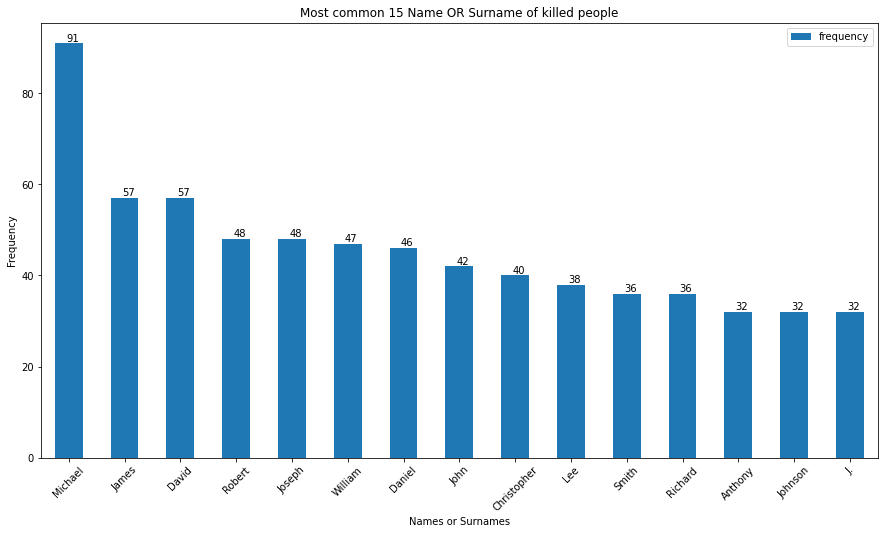

In [ ]:
# with pandas
fig, ax = plt.subplots(figsize=(15,8))
df.plot(rot=45, kind='bar', ax=ax)

ax.set_ylabel("Frequency")
ax.set_xlabel("Names or Surnames")
ax.set_title("Most common 15 Name OR Surname of killed people")
ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

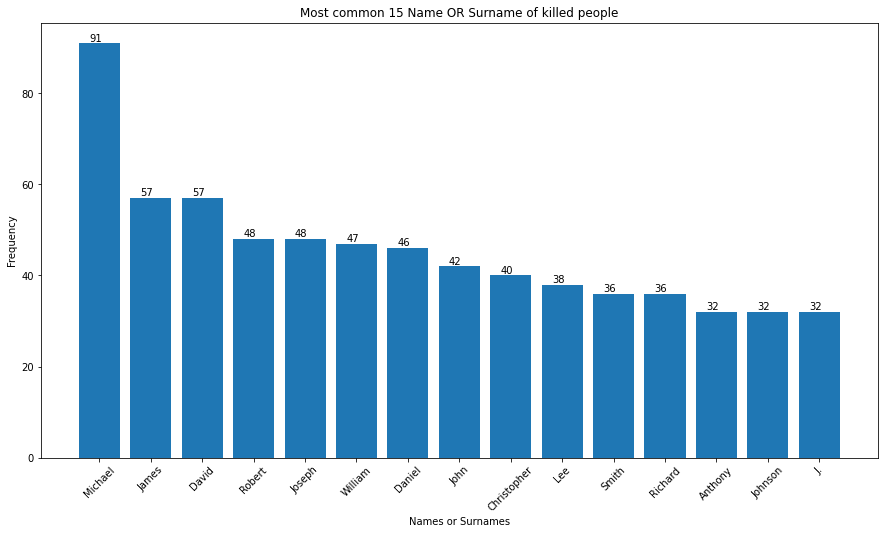

In [ ]:
# with matplotlib
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=df.name_or_surname_most_frequency, height=df.frequency)

ax.set_ylabel("Frequency")
ax.set_xlabel("Names or Surnames")
ax.set_title("Most common 15 Name OR Surname of killed people")

ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

# by surname

In [ ]:
table2=[]
for i in name_pairs:
    table2.append(i[-1])
len(table2)

2486

In [ ]:
name={}
for i in table2:
  if i in name:
    name[i] +=1
  else:
    name[i] = 1
len(name)

1721

In [ ]:
sorted(name.items(), key=lambda x: x[1], reverse=True)[:10]

[('Smith', 36),
 ('Johnson', 32),
 ('Jr.', 20),
 ('Williams', 18),
 ('Brown', 15),
 ('Anderson', 15),
 ('Jones', 14),
 ('Hall', 13),
 ('Hernandez', 13),
 ('Davis', 13)]

In [ ]:
df_name = pd.DataFrame(sorted(name.items(), key=lambda x: x[1], reverse=True)[:10],columns=["name","val"])
df_name

,name,val
0,Smith,36
1,Johnson,32
2,Jr.,20
3,Williams,18
4,Brown,15
5,Anderson,15
6,Jones,14
7,Hall,13
8,Hernandez,13
9,Davis,13


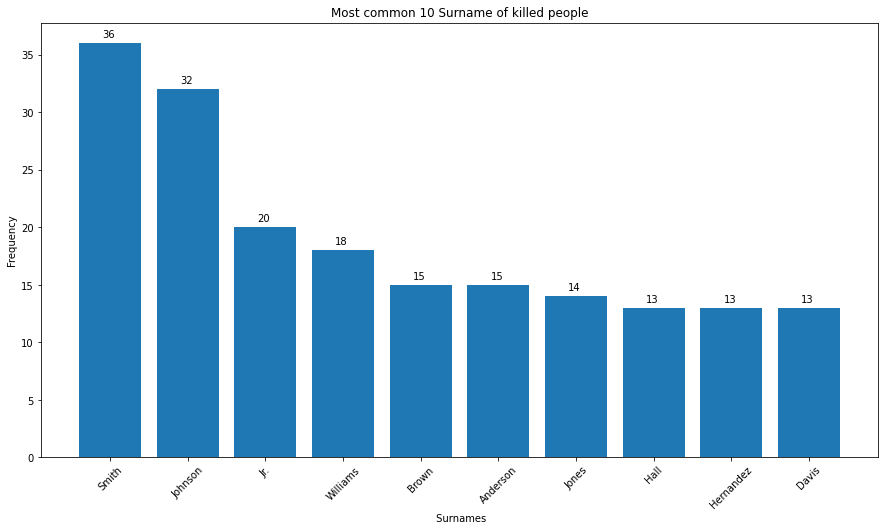

In [ ]:
# with matplotlib
x=df_name.name
y=df_name.val

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=x, height=y)

ax.set_ylabel("Frequency")
ax.set_xlabel(" Surnames")
ax.set_title("Most common 10 Surname of killed people")
ax.set_xticklabels(x, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.5));

# 7.Plots of age in both genders separeted by manner of death.

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


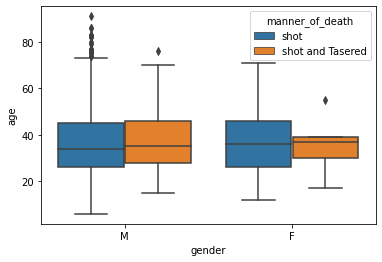

In [ ]:
#seaborn

sns.boxplot(y="age", x ="gender", hue = "manner_of_death", data=kill)

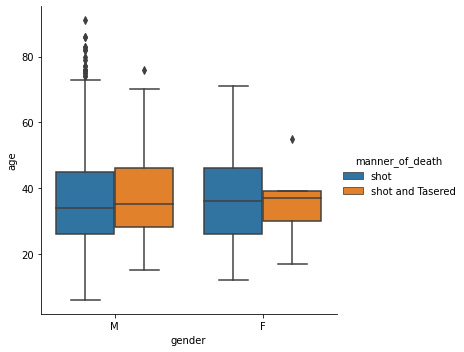

In [ ]:
#seaborn

sns.catplot(x="gender", y="age", data=kill,kind='box',hue="manner_of_death");

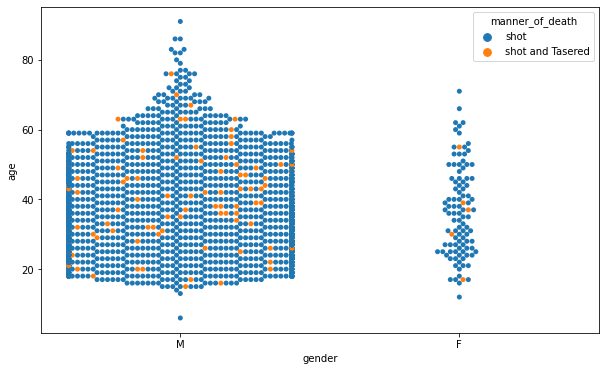

In [5]:
#seaborn

fig,ax= plt.subplots(figsize=(10,6))
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=kill):

# 8: Plot 12 most dangerous cities

In [17]:
city_freq=kill.city.value_counts()[:12]
city_freq

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

In [27]:
city_freq.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis',
       'Oklahoma City', 'Tucson'],
      dtype='object')

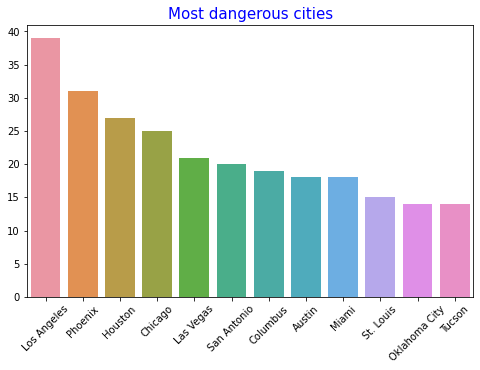

In [18]:
#seaborn

fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=city_freq.index, y=city_freq.values)
ax.set_xticklabels(city_freq.index, rotation = 45)
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15);

In [40]:
city_freq1=pd.DataFrame(city_freq)

In [39]:
import warnings
warnings.filterwarnings("ignore")

ValueError: ignored

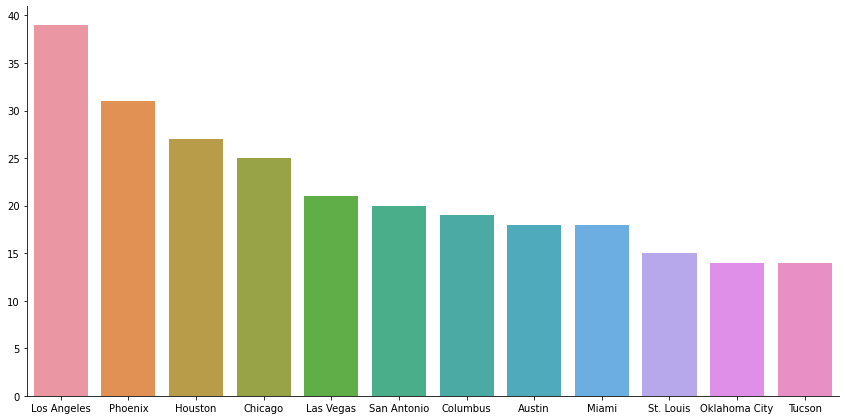

In [47]:
sns.catplot(x=city_freq.index, y=city_freq.values, data=city_freq1, kind='bar',height=6,aspect=2);

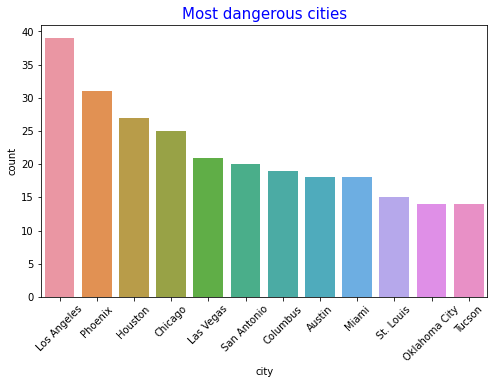

In [35]:
# seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="city", data=kill,
             order=city_freq.index,
             )
ax.set_xticklabels(city_freq.index, rotation = 45)
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15);

# 9: Plot 20 most dangerous states

In [45]:
state_freq = kill.state.value_counts()[:20]
state_freq

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

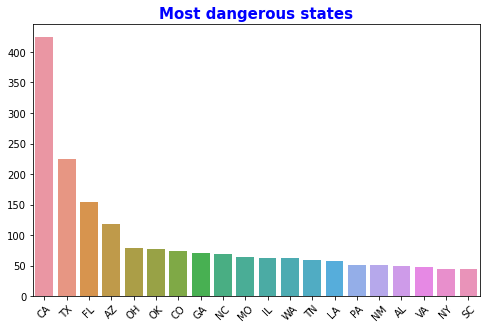

In [48]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=state_freq.index, y=state_freq.values)
ax.set_xticklabels(state_freq.index, rotation = 45)
ax.set_title('Most dangerous states',color = 'blue',fontsize=15,fontweight='bold');

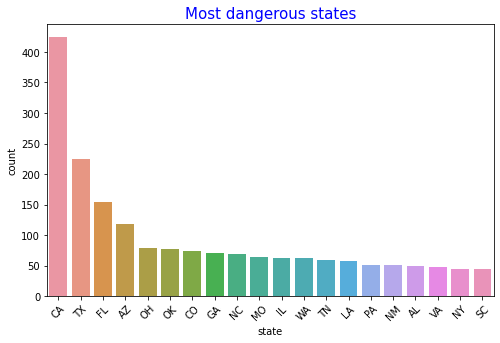

In [49]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="state", data=kill,
             order=state_freq.index,
             )
ax.set_xticklabels(state_freq.index, rotation = 45)
ax.set_title('Most dangerous states',color = 'blue',fontsize=15);

4: Plot Having mental ilness or not for killed people


In [50]:
illness = kill.signs_of_mental_illness.value_counts()
illness

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

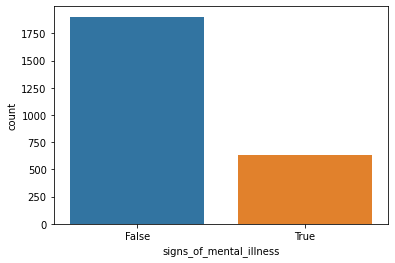

In [51]:
# seaborn
sns.countplot(kill.signs_of_mental_illness);

# 10: Plot number of Threat Types

In [52]:
threads_freq = kill.threat_level.value_counts()
threads_freq

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

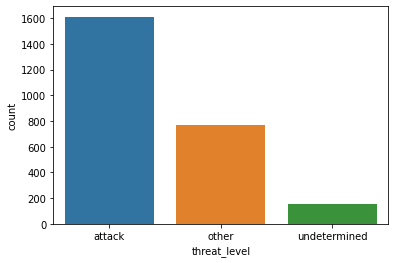

In [53]:
# with seaborn
sns.countplot(kill.threat_level);

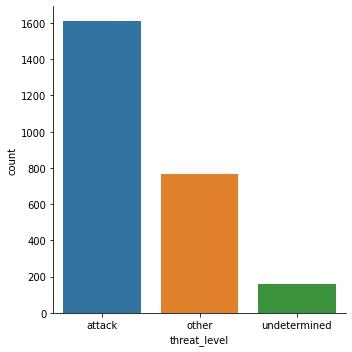

In [54]:
sns.catplot('threat_level',data=kill,kind='count');

# 11: Plot number of Flee Types

In [55]:
flee_freq = kill.flee.value_counts()
flee_freq

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

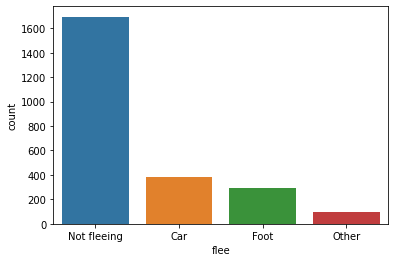

In [56]:
# with seaborn
sns.countplot(kill.flee);